## Data Preprocessing

On va partir sur des intervalles d'un mois i.e. $\Delta t = 1 \text{ jour}$

Chaque input sera une matrice 
$$
X_{t}=\left(\begin{array}{c}
x_{t}^{(1)} \\
\vdots \\
x_{t}^{(m)}
\end{array}\right)
$$  
avec $ \forall i \in [|1, m|], x_{t}^{(i)} \in \mathbb{R}^{1\times n_f}$ où $n_f$ est le nombre de features retenues et m est le nombre de zones.

Je veux retenir les features suivantes :
* nombre de sinistres
* nombre de sinistres d'intensité $M_c \in [3.5, 5[$ `mag1`
* nombre de sinistres d'intensité $M_c \in [5, 6[$ `mag2`
* nombre de sinistres d'intensité $M_c \in [6, 7[$ `mag3`
* nombre de sinistres d'intensité $M_c \geq 7$ `mag4`
* nombre de sinistres de profondeur $D \leq 80$ `depth1` 
* nombre de sinistres de profondeur $D \in [80, 200[$ `depth2`
* nombre de sinistres de profondeur $D \in [200, 450[$ `depth3` 
* nombre de sinistres de profondeur $D \geq 450$ `depth4`  
On ajoute également toutes les features de zones, sous la forme d'un One Hot Encoder.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("data.csv")

<AxesSubplot:xlabel='depth', ylabel='Count'>

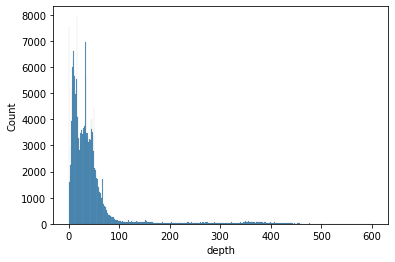

In [3]:
import seaborn as sns

sns.histplot(data.depth)

In [4]:
data.head()

,Unnamed: 0,year,month,date,hour,minute,seconds,lat,long,depth,class,zone
0,0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,96
1,1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,154
2,2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,213
3,3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,212
4,4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,230


In [5]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
data

,year,month,date,hour,minute,seconds,lat,long,depth,class,zone
0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,96
1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,154
2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,213
3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,212
4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,230
...,...,...,...,...,...,...,...,...,...,...,...
247469,2016,3,22,5,34,23.010,36.8300,140.5200,10.0,4.7,212
247470,2016,3,24,7,57,38.010,43.2500,145.6100,109.0,4.2,77
247471,2016,3,30,5,9,59.000,42.9100,144.7900,59.0,4.7,96
247472,2016,3,31,2,48,25.000,36.0600,140.2600,70.0,4.3,212


In [7]:
data["mag1"] = data['class'].apply(lambda x: (x >= 3.5 and x < 5))
data["mag2"] = data['class'].apply(lambda x: (x >= 5 and x < 6))
data["mag3"] = data['class'].apply(lambda x: (x >= 6 and x < 7))
data["mag4"] = data['class'].apply(lambda x: (x >= 7))

In [8]:
data

,year,month,date,hour,minute,seconds,lat,long,depth,class,zone,mag1,mag2,mag3,mag4
0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,96,False,False,False,False
1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,154,False,False,False,False
2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,213,False,False,False,False
3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,212,True,False,False,False
4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,230,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247469,2016,3,22,5,34,23.010,36.8300,140.5200,10.0,4.7,212,True,False,False,False
247470,2016,3,24,7,57,38.010,43.2500,145.6100,109.0,4.2,77,True,False,False,False
247471,2016,3,30,5,9,59.000,42.9100,144.7900,59.0,4.7,96,True,False,False,False
247472,2016,3,31,2,48,25.000,36.0600,140.2600,70.0,4.3,212,True,False,False,False


In [9]:
data["depth1"] = data['depth'].apply(lambda x: x < 80)
data["depth2"] = data['depth'].apply(lambda x: (x >= 80 and x < 200))
data["depth3"] = data['depth'].apply(lambda x: (x >= 200 and x < 450))
data["depth4"] = data['depth'].apply(lambda x: x >= 450)

In [10]:
data.head()

,year,month,date,hour,minute,seconds,lat,long,depth,class,zone,mag1,mag2,mag3,mag4,depth1,depth2,depth3,depth4
0,1990,1,1,2,19,5.018,42.2734,144.8460,8.0,2.9,96,False,False,False,False,True,False,False,False
1,1990,1,1,4,4,20.026,39.9358,142.5461,30.6,3.0,154,False,False,False,False,True,False,False,False
2,1990,1,1,7,14,11.038,36.7053,141.2990,18.6,2.7,213,False,False,False,False,True,False,False,False
3,1990,1,1,9,3,12.039,36.4859,140.6964,67.2,4.3,212,True,False,False,False,True,False,False,False
4,1990,1,1,12,31,25.018,35.0121,138.1440,22.6,2.5,230,False,False,False,False,True,False,False,False


In [14]:
data.drop(["hour", "minute", "seconds"], axis=1, inplace=True)

In [15]:
data.head()

,year,month,date,lat,long,depth,class,zone,mag1,mag2,mag3,mag4,depth1,depth2,depth3,depth4
0,1990,1,1,42.2734,144.8460,8.0,2.9,96,False,False,False,False,True,False,False,False
1,1990,1,1,39.9358,142.5461,30.6,3.0,154,False,False,False,False,True,False,False,False
2,1990,1,1,36.7053,141.2990,18.6,2.7,213,False,False,False,False,True,False,False,False
3,1990,1,1,36.4859,140.6964,67.2,4.3,212,True,False,False,False,True,False,False,False
4,1990,1,1,35.0121,138.1440,22.6,2.5,230,False,False,False,False,True,False,False,False


In [20]:
data.rename(columns={"date":"day"}, inplace=True)

In [23]:
data["date"] = pd.to_datetime(data[["year", "month", "day"]])

In [24]:
data.head()

,year,month,day,lat,long,depth,class,zone,mag1,mag2,mag3,mag4,depth1,depth2,depth3,depth4,date
0,1990,1,1,42.2734,144.8460,8.0,2.9,96,False,False,False,False,True,False,False,False,1990-01-01
1,1990,1,1,39.9358,142.5461,30.6,3.0,154,False,False,False,False,True,False,False,False,1990-01-01
2,1990,1,1,36.7053,141.2990,18.6,2.7,213,False,False,False,False,True,False,False,False,1990-01-01
3,1990,1,1,36.4859,140.6964,67.2,4.3,212,True,False,False,False,True,False,False,False,1990-01-01
4,1990,1,1,35.0121,138.1440,22.6,2.5,230,False,False,False,False,True,False,False,False,1990-01-01


In [26]:
data.date.dt.dayofyear

0          1
1          1
2          1
3          1
4          1
          ..
247469    82
247470    84
247471    90
247472    91
247473    95
Name: date, Length: 247474, dtype: int64

On utilisera dateofyear avec year pour obtenir toutes les matrices $X_t$

In [31]:
d1 = data[(data.year == 1990) & (data.date.dt.dayofyear == 1)]

In [32]:
d1

,year,month,day,lat,long,depth,class,zone,mag1,mag2,mag3,mag4,depth1,depth2,depth3,depth4,date
0,1990,1,1,42.2734,144.8460,8.0,2.9,96,False,False,False,False,True,False,False,False,1990-01-01
1,1990,1,1,39.9358,142.5461,30.6,3.0,154,False,False,False,False,True,False,False,False,1990-01-01
2,1990,1,1,36.7053,141.2990,18.6,2.7,213,False,False,False,False,True,False,False,False,1990-01-01
3,1990,1,1,36.4859,140.6964,67.2,4.3,212,True,False,False,False,True,False,False,False,1990-01-01
4,1990,1,1,35.0121,138.1440,22.6,2.5,230,False,False,False,False,True,False,False,False,1990-01-01
5,1990,1,1,35.1802,136.5092,11.0,2.5,228,False,False,False,False,True,False,False,False,1990-01-01
6,1990,1,1,39.8000,143.7200,0.0,3.0,155,False,False,False,False,True,False,False,False,1990-01-01


In [38]:
def to_input_data(year: int, dayofyear: int):
    """Renvoie la sparse matrix X_t correspondant"""
    X = np.zeros((360, 9))
    d = data[(data.year == year) & (data.date.dt.dayofyear == dayofyear)]
    for tup in d.itertuples():
        zone = tup.zone
        X[zone, 0] += 1  # nombre de sinistres sur la période
        X[zone, 1] += tup.mag1  # nombre de sinistre de catégorie mag1
        X[zone, 2] += tup.mag2  # nombre de sinistre de catégorie mag2
        X[zone, 3] += tup.mag3  # nombre de sinistre de catégorie mag3
        X[zone, 4] += tup.mag4  # nombre de sinistre de catégorie mag4
        X[zone, 5] += tup.depth1
        X[zone, 6] += tup.depth2
        X[zone, 7] += tup.depth3
        X[zone, 8] += tup.depth4

    return X

In [42]:
X_1 = to_input_data(1990, 1)

In [40]:
import torch

In [43]:
torch.randn((360, 9))

tensor([[ 0.6873, -0.9202, -0.4377,  ..., -0.4425, -0.3371, -1.1010],
        [ 1.2902, -0.3862, -1.9795,  ..., -0.9560,  0.2091, -1.0968],
        [-1.0643,  1.0157, -0.6707,  ..., -0.6436, -0.2058,  0.1111],
        ...,
        [-1.5919,  1.0751, -0.5899,  ...,  0.1887, -0.5884,  0.0045],
        [-1.7352, -0.6068, -1.0679,  ...,  0.8121, -0.6740,  2.0024],
        [-0.2222,  0.9340, -0.0442,  ...,  0.1913,  0.1013, -0.2782]])

In [45]:
torch.stack([torch.from_numpy(X_1), torch.randn((360, 9))])

tensor([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]],

        [[ 1.5222e+00, -1.0449e-01,  7.1215e-01,  ..., -1.7844e-02,
          -7.8749e-01,  8.6130e-01],
         [-1.8444e-01, -1.9871e-01, -2.2311e+00,  ...,  3.4722e-01,
          -4.1557e-01,  6.0555e-02],
         [-5.8816e-01, -1.0388e-03,  8.5972e-01,  ...,  1.5250e+00,
          -1.9931e+00, -2.4948e-02],
         ...,
         [ 8.2714e-01,  1

Je créee le tensor final contenant les données : $ D_x = \left\{X_t, 1 \leq t \leq n\right\} $ avec $n$ le nombre de vecteur $X_t$, soit, le nombre de jours entre le 1er janvier 1990 et le 4 avril 2016.

In [58]:
from itertools import product

# indices entre 01/01/1990 et 31/01/2015 (on ignore les années bissextiles)
dates_1 = list(product(list(range(1990, 2016)), list(range(1, 366))))

In [59]:
# indices entre 01/01/2016 et 04/04/2016 (= 95 ème jour)
dates_2 = [(2016, i) for i in range(96)]

In [60]:
dates = dates_1 + dates_2

In [61]:
len(dates)

9586

In [62]:
X_tot = []
for y, d in dates:
    X_tot.append(to_input_data(y, d))

In [65]:
XX_tot = torch.stack([torch.from_numpy(X_tot[i]) for i in range(len(X_tot))])

In [73]:
XX_tot = XX_tot.int()